## Import Library

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [54]:
df = pd.read_csv('Steel_industry_data.csv')

## Menampilkan Informasi dari Dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

## Menampilkan 10 data Teratas

In [56]:
df.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


## Distribusi data untuk setiap Variable

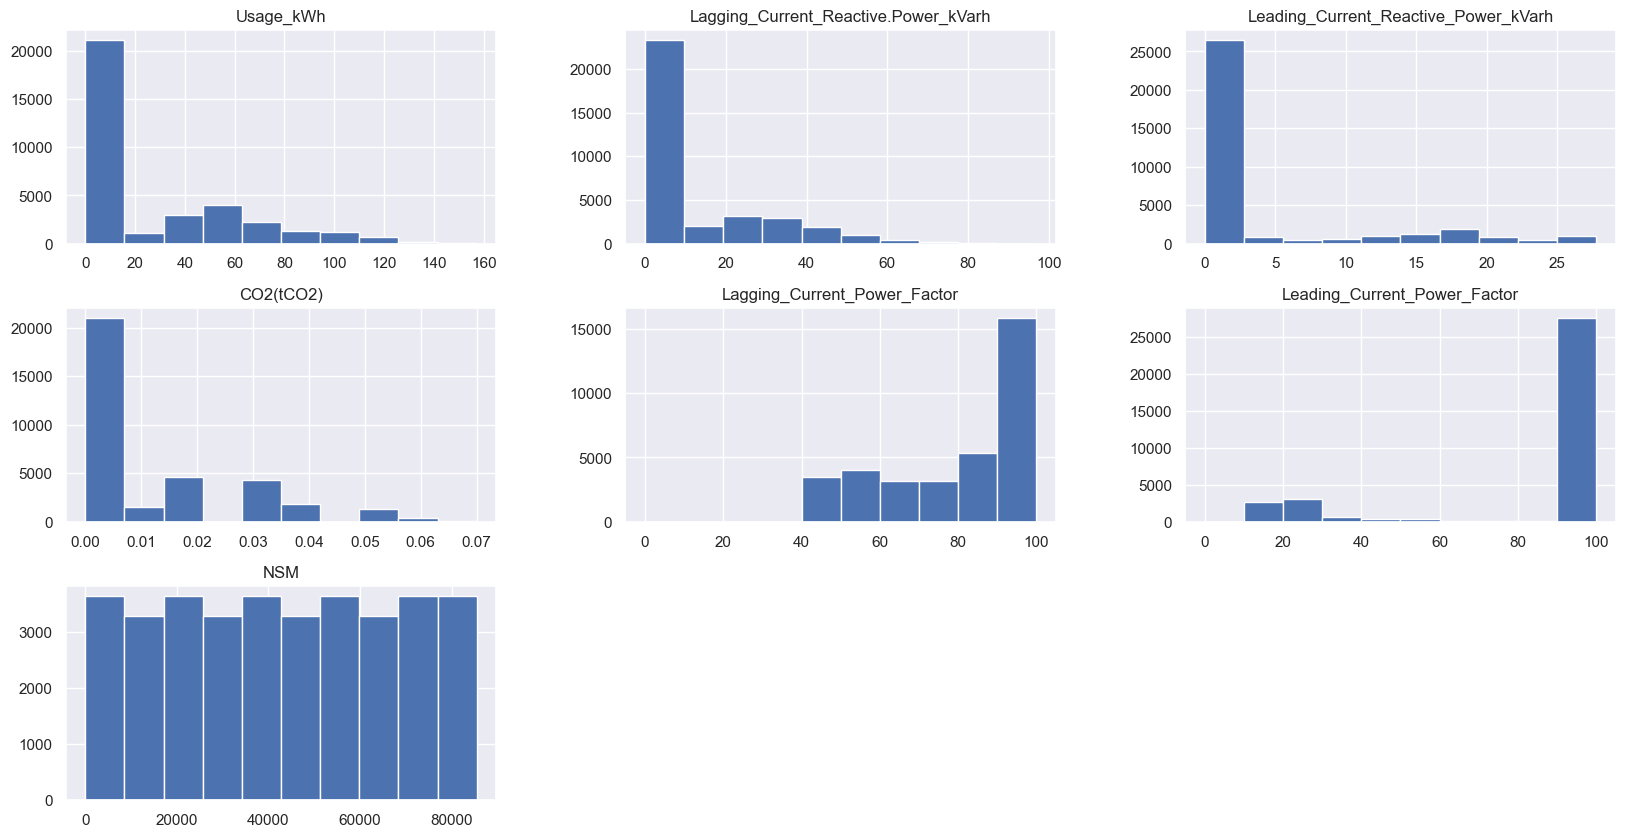

In [57]:
df.hist(figsize = (20,10))
plt.show()

## Heatmap untuk melihat korelasi antar kolom yang ada pada dataset

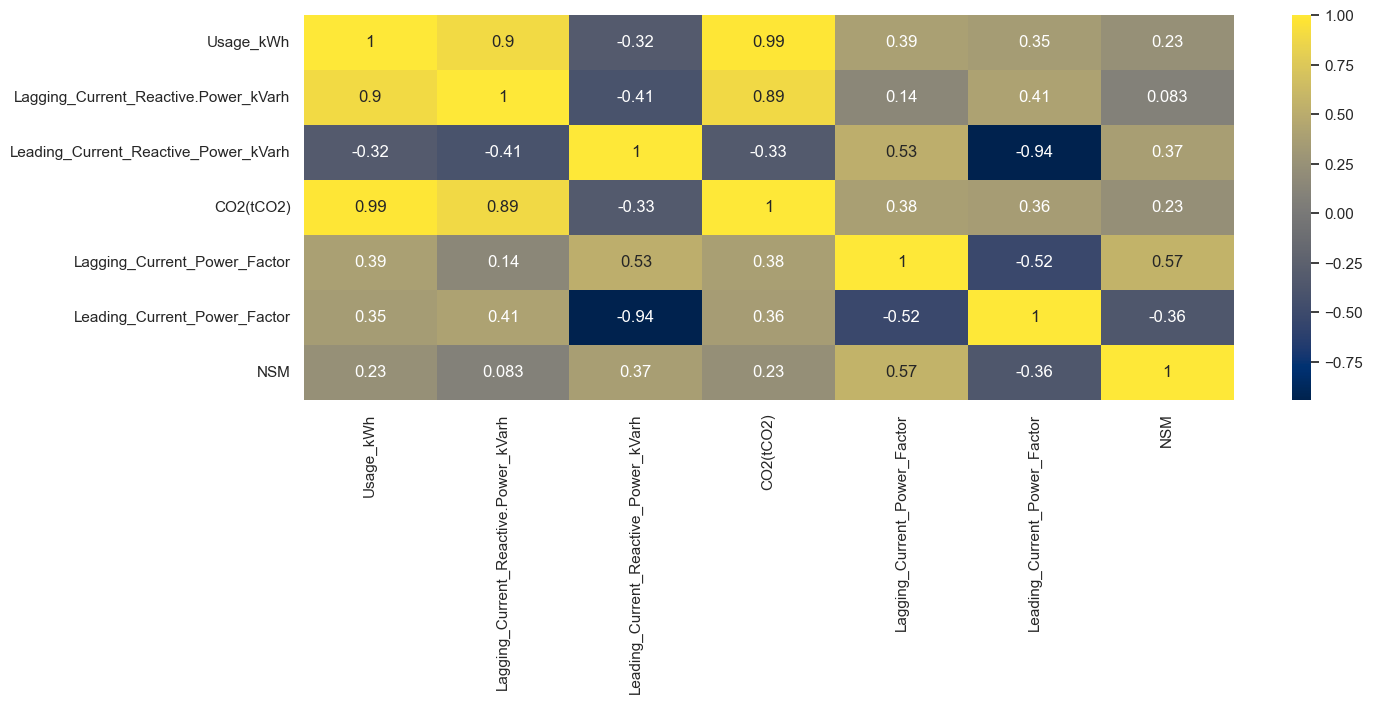

In [58]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="cividis")
plt.show()

## Grafik Batang untuk melihat jumlah dari tiap Load_Type

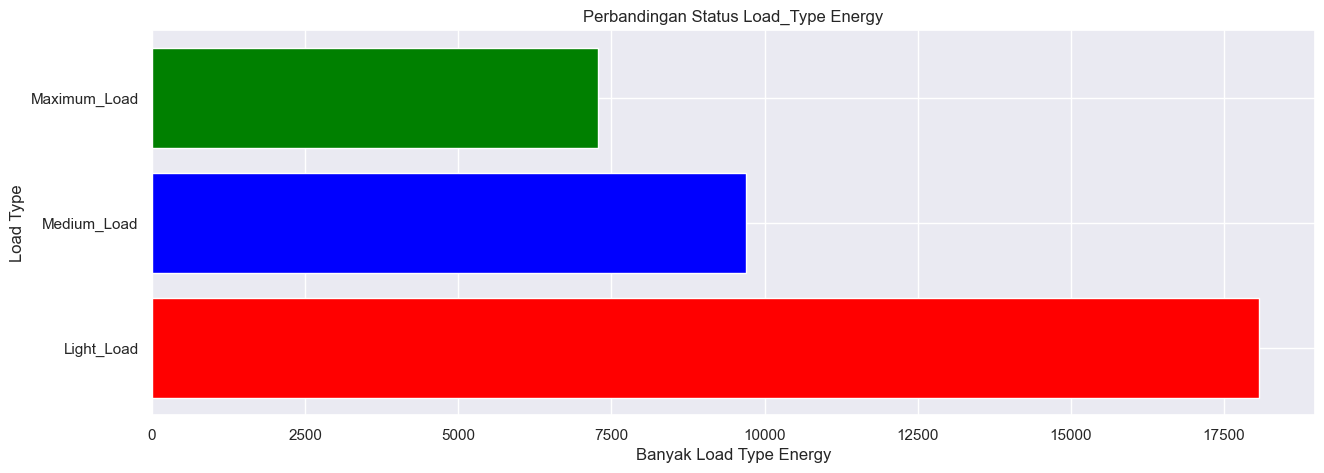

In [59]:
df_Usage_kwh = df['Load_Type'].value_counts()
plt.figure(figsize=(15,5))
plt.barh(df_Usage_kwh.index, df_Usage_kwh.values, color=['red', 'blue', 'green'])
plt.xlabel('Banyak Load Type Energy')
plt.ylabel('Load Type')
plt.title('Perbandingan Status Load_Type Energy')
plt.show()

## Perbandingan Jumlah Load_Type setiap Minggunya

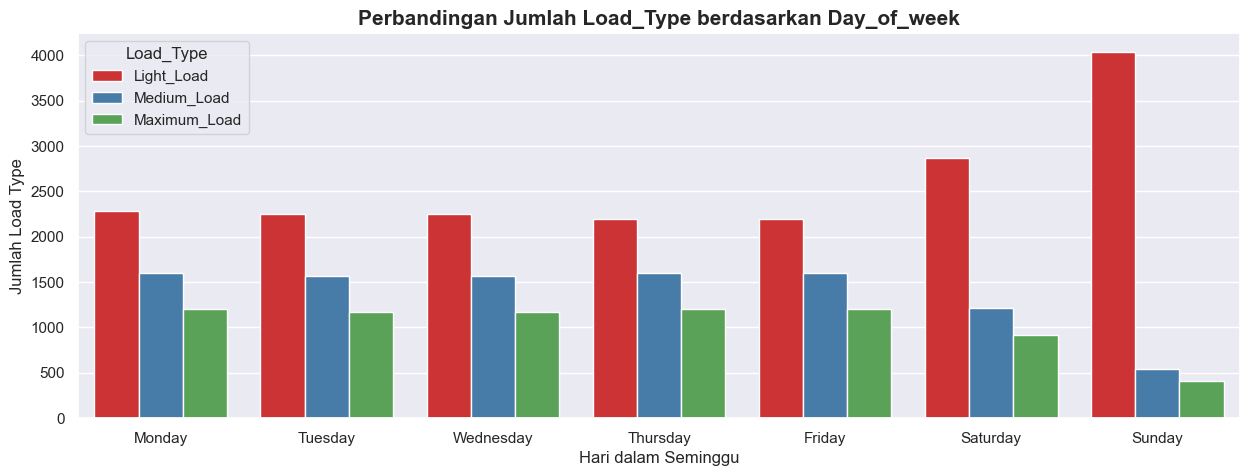

In [60]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Day_of_week", palette="Set1", hue="Load_Type")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Load Type")
plt.title("Perbandingan Jumlah Load_Type berdasarkan Day_of_week", fontsize=15, fontweight="bold")
plt.show()

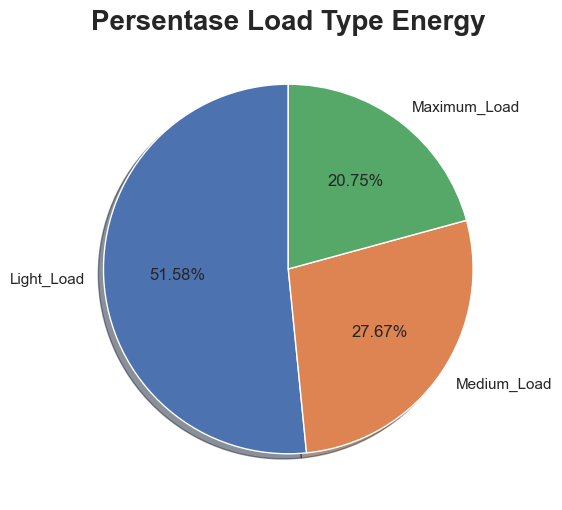

In [61]:
sns.set_theme()
dfLoadType = df['Load_Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.title("Persentase Load Type Energy", fontsize=20, fontweight='bold')
plt.pie(dfLoadType.values, 
        labels=dfLoadType.index, 
        autopct='%.2f%%', 
        startangle=90,
        shadow=True
        )
plt.show()

## Kesimpulan

<b>Heatmap :</b>
1. korelasi antara Usage_kWh dan CO2(tCO2) itu sangat tinggi yaitu 0.99, korelasi positif yang tinggi ini menunjukkan bahwa semakin tinggi penggunaan energi (usage_kwh), semakin tinggi pula emisi karbon dioksida (CO2(tCO2)).

2. Korelasi antara Usage_kWh dan Lagging_Current_Reactive.Power_kVarh itu juga tinggi yaitu 0.9, Korelasi yang tinggi menunjukkan bahwa Penggunaan energi yang tinggi dapat menyebabkan terjadinya daya reaktif yang lebih besar.

3. Korelasi antara CO2(tCO2) dan Lagging_Current_Reactive.Power_kVarh juga tinggi yaitu 0.89, Hal ini dapat menunjukkan bahwa ketika terjadi peningkatan daya reaktif saat beban terlambat, terdapat kecenderungan untuk meningkatkan emisi karbon dioksida.

<b>Load_Type</b>
1. Jika dilihat dari segi jenis muatan (Load_Type) di tiap minggunya penggunaan muatan cukup sama / stabil di 5 hari pertama pada tiap minggu, dan penggunaan jenis Light_Load akan bertambah tinggi pada weekends seiiring Medium_Load dan Maximum_Load menurun.

2. Dapat dilihat juga persentase penggunaan muatan Light_Load cukup tinggi dibandingan dengan jenis muatan lainnya, karena bisa saja semakin tinggi jenis muatannya akan meningkatkan Jumlah Usage_kWh nya dan emisi Karbon dioksidanya, tetapi tidak menutup kemungkinan juga kalau Light_Load dapat meningkatnya Jumlah Usage_kWh nya dan emisi Karbon dioksida mengingat banyaknya penggunaan tipe muatan (Load_Type) tersebut.